In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency


csv_file = Path('Resources/framingham.csv')

heart_analysis_df = pd.read_csv(csv_file)

heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Male vs Female Population

### Analysis:

In [ ]:
male_count = (heart_analysis_df['male'] == 1).sum()
female_count = (heart_analysis_df['male'] == 0).sum()
print(f'males: {male_count}')
print(f'females: {female_count}')
print(f'total population: {male_count+female_count}')
labels = ['female', 'male']
sizes = [female_count, male_count]
sex_population_df = pd.DataFrame({'Sex': labels, 'Count': sizes})
sex_population_df.plot.pie(y='Count', labels=sex_population_df['Sex'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Male and Female')
plt.show()

In [ ]:
diabetes_count = (heart_analysis_df['diabetes'] == 1).sum()
non_diabetes_count = (heart_analysis_df['diabetes'] == 0).sum()
print(f'Diabetes: {diabetes_count}')
print(f'Non-diabetic: {non_diabetes_count}')
print(f'Total population: {diabetes_count+non_diabetes_count}')
labels = ['Diabetes', 'Non-diabetic']
sizes = [diabetes_count, non_diabetes_count]
diabetes_population_df = pd.DataFrame({'diabetes': labels, 'Count': sizes})
diabetes_population_df.plot.pie(y='Count', labels=diabetes_population_df['diabetes'], autopct='%1.1f%%', legend=False, startangle=90)
plt.title('Distribution of Diabetes and Non-diabetic')
plt.show()

In [ ]:
contingency_table = pd.crosstab(heart_analysis_df['diabetes'], heart_analysis_df['TenYearCHD'])

# Perform the Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

In [ ]:
smoker_count = (heart_analysis_df['currentSmoker'] == 1).sum()
non_smoker_count = (heart_analysis_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Distribution of Smoker and Non-Smoker')
plt.show()

In [ ]:
male_df = heart_analysis_df[heart_analysis_df['male'] == 1]
smoker_count = (male_df['currentSmoker'] == 1).sum()
non_smoker_count = (male_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Male Distribution of Smoker and Non-Smoker')
plt.show()

In [ ]:
female_df = heart_analysis_df[heart_analysis_df['male'] == 0]
smoker_count = (female_df['currentSmoker'] == 1).sum()
non_smoker_count = (female_df['currentSmoker'] == 0).sum()
print(f'Diabetes: {smoker_count}')
print(f'Non-diabetic: {non_smoker_count}')
print(f'Total population: {smoker_count+non_smoker_count}')
labels = ['Smoker', 'Non-smoker']
sizes = [smoker_count, non_smoker_count]
smoker_population_df = pd.DataFrame({'currentSmoker': labels, 'Count': sizes})
smoker_population_df.plot.pie(y='Count', labels=smoker_population_df['currentSmoker'], autopct='%1.1f%%', legend=False)
plt.title('Female Distribution of Smoker and Non-Smoker')
plt.show()

In [ ]:

education_counts_df = heart_analysis_df

education_counts_df['education'] = education_counts_df['education'].astype(str)

education_counts_df['education'] = education_counts_df['education'].replace('nan', 'Not Specified')

education_counts_df = education_counts_df['education'].value_counts().sort_index()

education_counts_df.plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0) 
plt.show()

In [ ]:
# Create a histogram for the age distribution
age_histogram = heart_analysis_df
plt.hist(age_histogram['age'], bins=10, edgecolor='black') 
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.75) 

plt.show()

In [ ]:
number_of_male_TYCHD = male_df[male_df['TenYearCHD'] == 1]['TenYearCHD'].sum()
number_of_female_TYCHD = female_df[female_df['TenYearCHD'] == 1]['TenYearCHD'].sum()

male_percentage = round((number_of_male_TYCHD/male_df["TenYearCHD"].count()) * 100, 2)
female_percentage = round((number_of_female_TYCHD/female_df["TenYearCHD"].count()) * 100, 2)

print(f'Male % of heart disease: {male_percentage}%')
print(f'Female % of heart disease: {female_percentage}%')

## Atuls's Section

In [ ]:
print('This is your teammates Atul\'s Section')

## Ezrelle's Section

In [ ]:
import numpy as np
# Generate some random data
data = {'x': np.random.rand(10),
        'y': np.random.rand(10)}
df = pd.DataFrame(data)

# Plot the data
plt.scatter(df['x'], df['y'])

# Coordinates where you want to place the plus sign
plus_x, plus_y = 0.5, 0.5 # Adjust these values as needed

# Plotting the plus sign
plt.plot(plus_x, plus_y, marker='+', markersize=20, color='red')

# Display the plot
plt.show()

# BPMeds Analysis
Analysis here is based on certain key variables such as age, blood pressure medication usage (BPMeds), and the incidence of Ten Year CHD.

### Analysis
1. Approximately 15% of the Framingham Dataset has the incidence of Ten Year CHD (Coronary Heart Disease)
2. 3% of individuals reported using the Blood Pressure Medications, among with 1% have the incidence of CHD
3. With a small p-value (e.g., 3.10e-08), we reject the null hypothesis. Meaning there is significant association between the bpmeds and TenYearCHD variables, and individuals taking bpmeds may have a different risk of developing CHD within ten years compared to those not taking medication.
4. High CHi Square (30.65) shows the a stronger association between the variables

### Age - BPMeds - TenYearCHD Analyis
1. The majority of individuals in this dataset fall within the age range of 30 to 70 years.
2. The distribution of age in the dataset is relatively normal, mean age is approximately 49 years
3. The p-value on a T-test is less than 0.05, it means that there is statistically significant difference between the mean ages of the two populations, and the age distribution of individuals on blood pressure medication differs significantly from those not on medication.

In [2]:
bpmeds_df = heart_analysis_df[["BPMeds","TenYearCHD"]]
# drop null values
bpmeds_df = bpmeds_df.dropna()
bpmeds_df


,BPMeds,TenYearCHD
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,1
4,0.0,0
...,...,...
4234,0.0,0
4236,0.0,0
4237,0.0,0
4238,0.0,0


Approximately 15.12% of the dataset has the incidence of Ten Year CHD


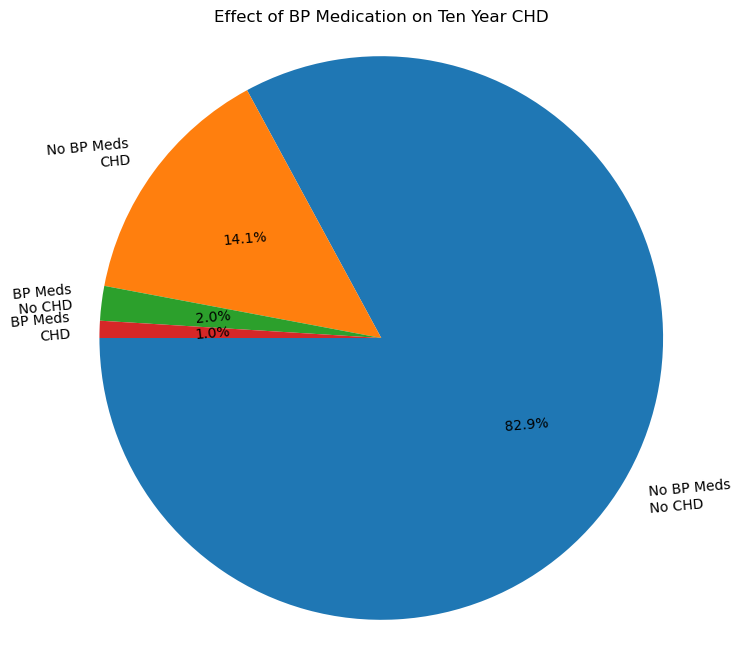

In [4]:
# Percentage of TenYearCHD in the dataset
chd_percentage = round( bpmeds_df[bpmeds_df["TenYearCHD"] == 1]["TenYearCHD"].count() / bpmeds_df["TenYearCHD"].count() * 100 , 2)
chd_percentage
print(f"Approximately {chd_percentage}% of the dataset has the incidence of Ten Year CHD")

# Group data by bpmeds and TenYearCHD and count occurrences
bpmeds_chd_counts = bpmeds_df.groupby(['BPMeds', 'TenYearCHD']).size().unstack()

# Count the number of individuals on bpmeds
bpmeds_counts = bpmeds_df['BPMeds'].value_counts()

# Plotting
labels = ['No BP Meds\nNo CHD', 'No BP Meds\nCHD', 'BP Meds\nNo CHD', 'BP Meds\nCHD']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(bpmeds_chd_counts.values.flatten(), labels=labels, autopct='%1.1f%%', startangle=180,textprops={'rotation': 5})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Effect of BP Medication on Ten Year CHD')
plt.show()


TenYearCHD     0    1
BPMeds               
0.0         3471  592
1.0           83   41


<Figure size 600x400 with 0 Axes>

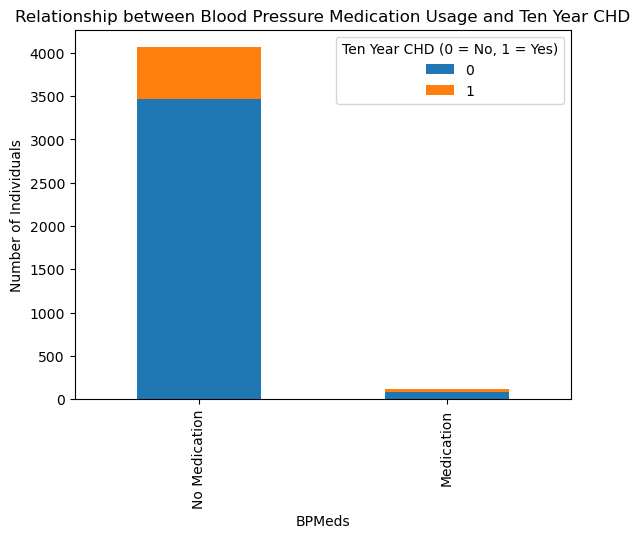

In [5]:
bpmeds_chd_counts = bpmeds_df.groupby(['BPMeds', 'TenYearCHD']).size().unstack()
print(bpmeds_chd_counts)

# Plot the relationship between BPMeds and TenYearCHD using matplotlib
plt.figure(figsize=(6,4))
bpmeds_chd_counts.plot(kind='bar', stacked=True)
plt.title('Relationship between Blood Pressure Medication Usage and Ten Year CHD')
plt.xlabel('BPMeds')
plt.ylabel('Number of Individuals')
plt.xticks(ticks=[0,1], labels=['No Medication', 'Medication'])
plt.legend(title='Ten Year CHD (0 = No, 1 = Yes)', loc='upper right')
plt.show()

In [6]:
# Age - BPMeds - TenYearCHD
bpmeds_age_chd_df = heart_analysis_df[["BPMeds", "TenYearCHD", "age"]]

#Drop null values
bpmeds_age_chd_df = bpmeds_age_chd_df.dropna()

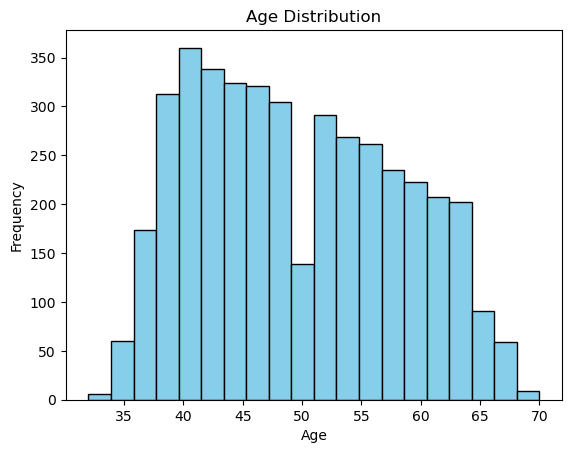

49.53069023166945


In [7]:

# Plot age distribution
plt.hist(bpmeds_age_chd_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Average Age in the given dataset with BPMeds
average_age = bpmeds_age_chd_df["age"].mean()
print(average_age)


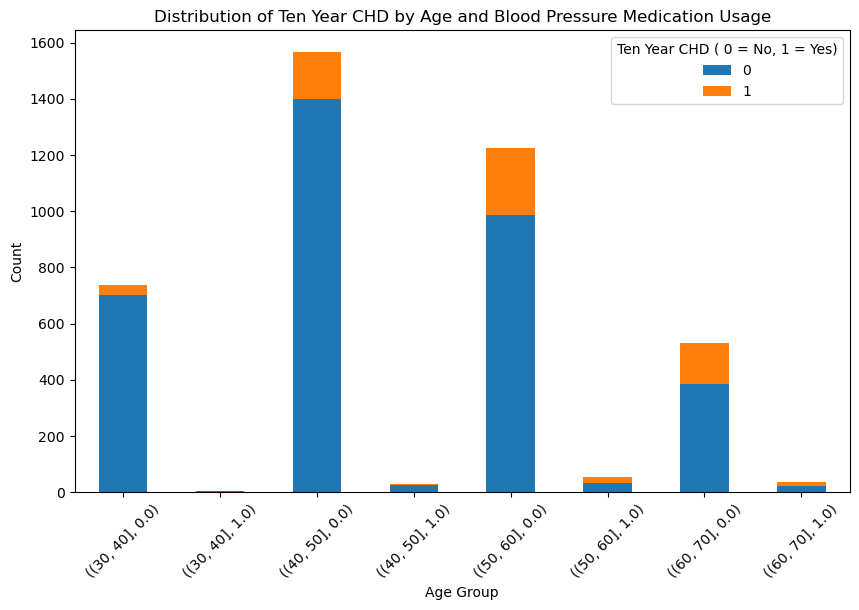

In [8]:

bin_edges = [30, 40, 50, 60, 70]
age_bins = pd.cut(bpmeds_age_chd_df['age'], bins=bin_edges)

# Calculate counts of TenYearCHD for each age group and BPMeds
age_bpmeds_chd_counts = bpmeds_age_chd_df.groupby([age_bins, 'BPMeds', 'TenYearCHD']).size().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(10,6))
age_bpmeds_chd_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Ten Year CHD by Age and Blood Pressure Medication Usage')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ten Year CHD ( 0 = No, 1 = Yes)', loc='upper right')
plt.show()

In [10]:
# calculate the population mean for BPMeds usage
bpmeds_population = bpmeds_age_chd_df[bpmeds_age_chd_df["BPMeds"] == 1]
bpmeds_population.age.mean()

no_bpmeds_population = bpmeds_age_chd_df[bpmeds_age_chd_df["BPMeds"] == 0]
no_bpmeds_population.age.mean()

# Calculate Independent (Two Sample) t-test
stats.ttest_ind(bpmeds_population.age, no_bpmeds_population.age, equal_var=False)

TtestResult(statistic=8.706434092108239, pvalue=1.1103793551847556e-14, df=132.0938305139023)

In [11]:
# Contingency table
contingency_table = pd.crosstab(bpmeds_df['BPMeds'], bpmeds_df['TenYearCHD'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 30.6459909156739
p-value: 3.0966578525207775e-08


## Tianyue's Section

In [ ]:
print('This is your teammates Tianyue\'s Section')